<h1 style="margin-bottom: 0px;"><center><strong>Universidade Federal do Rio de Janeiro</strong></center></h1>
<h3><center><strong>Programa de Pós-Graduação em Meteorologia</strong></center></h3>
<h4><center>Disciplina de Instrumentação Oceanográfica</center></h4>
<h4><center>Atividade I</center></h4>
<h4><center>Medidas de marés e procedimentos de monitoramento</center></h4>

In [1]:
import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline

### Carregando os dados:

In [2]:
col_names = ['datetime', 'water_level']


file_1_path = "dataset/_LeituraRegua_Dia_1.txt"
file_2_path = "dataset/_LeituraRegua_Dia_2.txt"
file_3_path = "dataset/_V000001.TXT"

tide_1_dia_1 = pd.read_csv(file_1_path,
                           header = None, 
                           skiprows = 5, 
                           nrows=52,
                           names = col_names,
                           encoding="ISO-8859-1",
                           delimiter = "\t",
                           index_col=False)

tide_1_dia_2 = pd.read_csv(file_2_path,
                           header = None,
                           skiprows = 5,
                           nrows=61,
                           names = col_names,
                           encoding="ISO-8859-1",
                           delimiter = "\t")
# Sensor

cols_file2 = ['Timestamp', 'Depth', 'Depth stdev']
tide_2 = pd.read_csv(file_3_path,
                     header=20,
                     usecols=cols_file2,
                     delimiter="\t")

tide_2.columns = ['datetime','water_level','Depth stdev']

In [3]:
# To datetime 
tide_1_dia_1['datetime'] = pd.to_datetime(tide_1_dia_1['datetime'], format = "%d/%m/%Y %H:%M")
tide_1_dia_2['datetime'] = pd.to_datetime(tide_1_dia_2['datetime'], format = "%d/%m/%Y %H:%M")

### Plotando os dados

In [4]:
# Configurando alguns padroes para as figuras
figsize_plots = (16,6)
fontsize_legend = 14
fontsize_title = 16
fontsize_ticks = 14
fontsize_label = 14

# ax.plot(tide_1_dia_2['datetime'], tide_1_dia_2['water_level'], marker=".", label = "Manual")
# ax.plot(tidemaster_day2['datetime'], tidemaster_day2['water_level'], marker=".", label = "Automática")
# ax.tick_params('x', labelrotation=45)
# ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_minor_locator(min10)
# ax.xaxis.set_major_locator(hora)
# ax.set_title("Dia 2 - 04/11/2018")
# ax.tick_params(labelsize=fontsize_ticks)
# ax.grid()
# ax.legend(fontsize = 14)
    

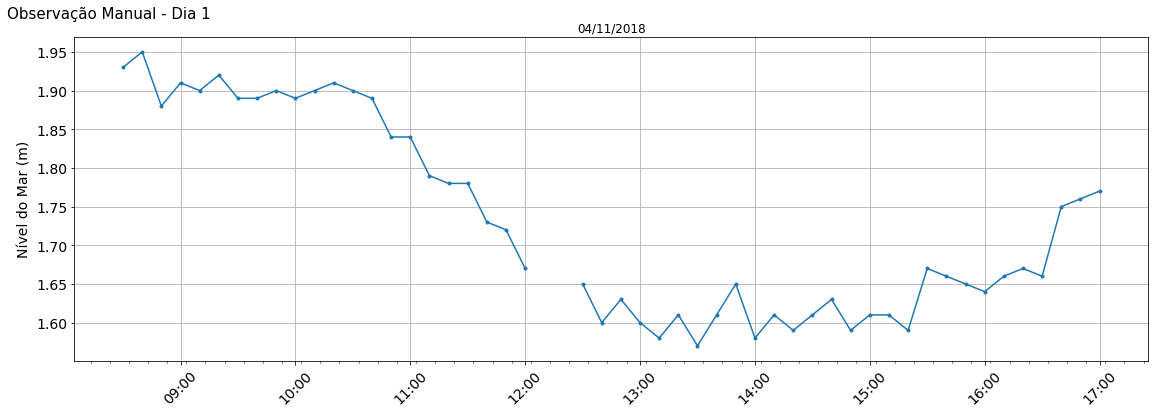

In [6]:
#Dia 1

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Observação Manual - Dia 1", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
min30 = mdates.MinuteLocator(interval = 10)
hora = mdates.HourLocator(interval = 1)


ax.plot(tide_1_dia_1['datetime'], tide_1_dia_1['water_level'], marker=".")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(min30)
ax.xaxis.set_major_locator(hora)
ax.set_title('04/11/2018')
ax.tick_params(labelsize=fontsize_ticks)
ax.grid()
    
fig.tight_layout()
plt.savefig('manual_dia_1_raw.png', dpi = 300)

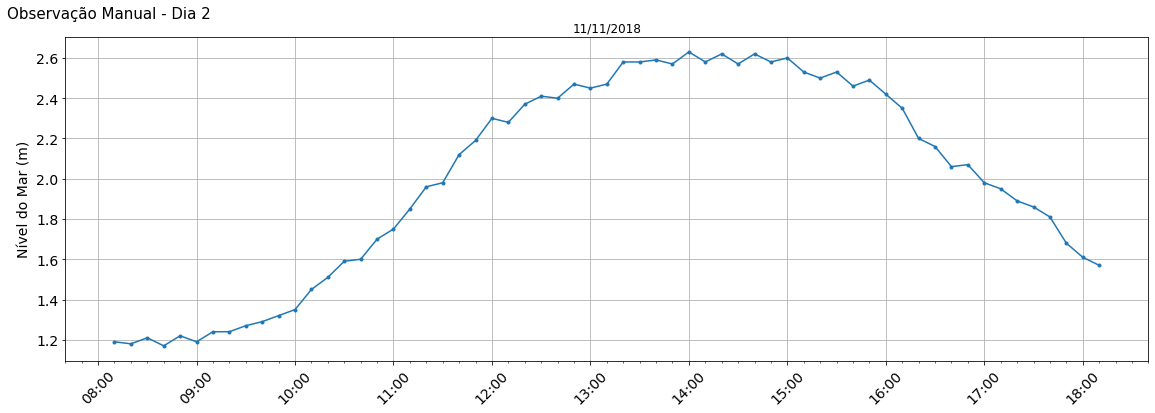

In [5]:
#Dia 2

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Observação Manual - Dia 2", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
min30 = mdates.MinuteLocator(interval = 10)
hora = mdates.HourLocator(interval = 1)


ax.plot(tide_1_dia_2['datetime'], tide_1_dia_2['water_level'], marker=".")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(min30)
ax.xaxis.set_major_locator(hora)
ax.set_title("11/11/2018")
ax.tick_params(labelsize=fontsize_ticks)
ax.grid()
    
fig.tight_layout()
plt.savefig('manual_dia_2_raw.png', dpi = 300)

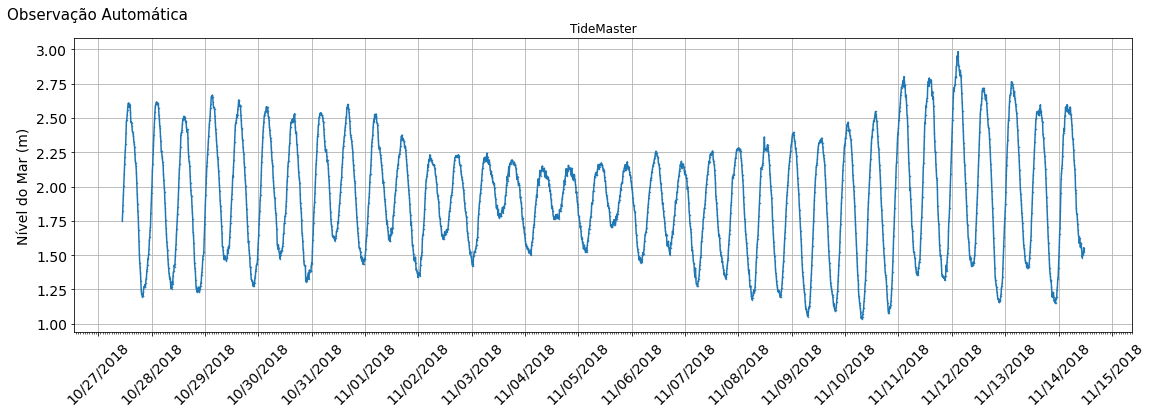

In [6]:
# Tratando timestamp

tide_2["datetime"] = pd.to_datetime(tide_2["datetime"], format = "%d/%m/%Y %H:%M")

#Dia 1

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Observação Automática", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
dia = mdates.DayLocator(interval = 1)
min30 = mdates.MinuteLocator(interval = 10)
hora = mdates.HourLocator(interval = 1)


ax.plot(tide_2['datetime'], tide_2['water_level'], marker=".", markersize = 1)
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_minor_locator(hora)
ax.xaxis.set_major_locator(dia)
ax.tick_params(labelsize=fontsize_ticks)
ax.set_title("TideMaster")
ax.grid()
    
fig.tight_layout()
plt.savefig('tidemaster_plot.png', dpi = 300)


### Comparando os dados manuais X automático

In [7]:
tidemaster_day1 = tide_2[(tide_2["datetime"] >= tide_1_dia_1['datetime'][0]) & (tide_2["datetime"] <= tide_1_dia_1['datetime'].iloc[-1])]

In [8]:
tidemaster_day2 = tide_2[(tide_2["datetime"] >= tide_1_dia_2['datetime'][0]) & (tide_2["datetime"] <= tide_1_dia_2['datetime'].iloc[-1])]

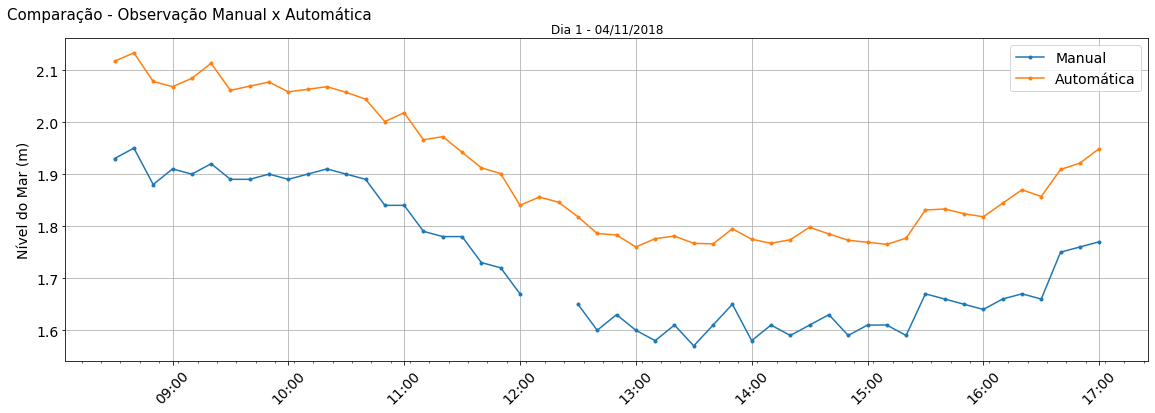

In [101]:
# PLOT DIA 1
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Comparação - Observação Manual x Automática",x=0.0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
min10 = mdates.MinuteLocator(interval = 10)
hora = mdates.HourLocator(interval = 1)


ax.plot(tide_1_dia_1['datetime'], tide_1_dia_1['water_level'], marker=".", label = "Manual")
ax.plot(tidemaster_day1['datetime'], tidemaster_day1['water_level'], marker=".", label = "Automática")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(min10)
ax.xaxis.set_major_locator(hora)
ax.set_title("Dia 1 - 04/11/2018")
ax.tick_params(labelsize=fontsize_ticks)
ax.grid()
ax.legend(fontsize = fontsize_legend)
    
fig.tight_layout()
plt.savefig('manual_x_auto_dia1.png', dpi = 300)

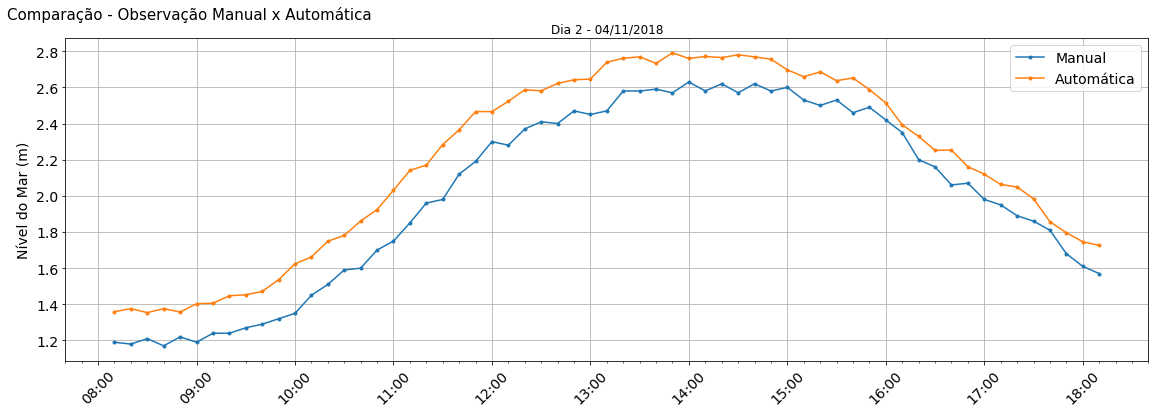

In [102]:
# PLOT DIA 2
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Comparação - Observação Manual x Automática", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
min10 = mdates.MinuteLocator(interval = 10)
hora = mdates.HourLocator(interval = 1)


ax.plot(tide_1_dia_2['datetime'], tide_1_dia_2['water_level'], marker=".", label = "Manual")
ax.plot(tidemaster_day2['datetime'], tidemaster_day2['water_level'], marker=".", label = "Automática")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(min10)
ax.xaxis.set_major_locator(hora)
ax.set_title("Dia 2 - 04/11/2018")
ax.tick_params(labelsize=fontsize_ticks)
ax.grid()
ax.legend(fontsize = fontsize_legend)
    
fig.tight_layout()
plt.savefig('manual_x_auto_dia2.png', dpi = 300)

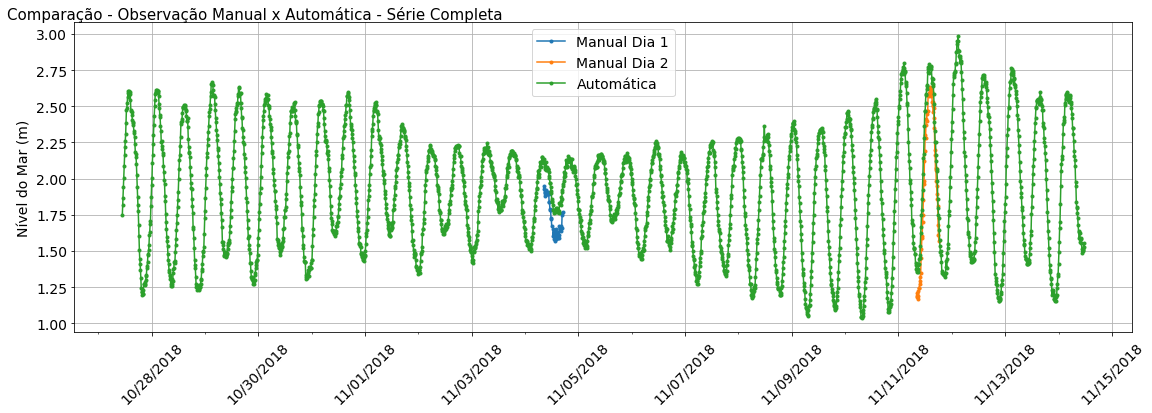

In [103]:
# Todos plots juntos...

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Comparação - Observação Manual x Automática - Série Completa", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#ticks 
dias = mdates.DayLocator(interval = 2)
dia = mdates.DayLocator(interval = 1)
hora = mdates.HourLocator(interval = 1)

ax.plot(tide_1_dia_1['datetime'], tide_1_dia_1['water_level'], marker=".", label = "Manual Dia 1")
ax.plot(tide_1_dia_2['datetime'], tide_1_dia_2['water_level'], marker=".", label = "Manual Dia 2")
ax.plot(tide_2['datetime'], tide_2['water_level'], marker=".", label = "Automática")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_minor_locator(dia)
ax.xaxis.set_major_locator(dias)
ax.tick_params(labelsize=fontsize_ticks)
ax.grid()
ax.legend(fontsize = fontsize_legend)
    
fig.tight_layout()
plt.savefig('all_plots_raw.png', dpi = 300)

In [9]:
from scipy.stats import pearsonr

In [10]:
# Para o dia 1, é necessário retirar os horários com dados NaNs

# Mesmo index para os dois dataframes
tidemaster_day1.reset_index(inplace=True)
tide_1_dia_1.reset_index(inplace=True)

# Mesmo index para os dois dataframes
tidemaster_day2.reset_index(inplace=True)
tide_1_dia_2.reset_index(inplace=True)


In [11]:
np.isnan(tide_1_dia_1['water_level'])

filter_tidemaster_day1 = tidemaster_day1[~np.isnan(tide_1_dia_1['water_level'])]
filter_tide1_dia1 = tide_1_dia_1[~np.isnan(tide_1_dia_1['water_level'])]

In [12]:
corr_day1, _ = pearsonr(filter_tide1_dia1['water_level'], filter_tidemaster_day1['water_level'])

In [13]:
corr_day2, _ = pearsonr(tide_1_dia_2['water_level'], tidemaster_day2['water_level'])

In [14]:
print(corr_day1, corr_day2)

0.9932661710185148 0.9933065482164483


In [19]:
print("Mean Day1:", "Manual", filter_tide1_dia1['water_level'].mean(), "TideMaster",filter_tidemaster_day1['water_level'].mean())
print("Mean Day2:", "Manual", tide_1_dia_2['water_level'].mean(), "TideMaster", tidemaster_day2['water_level'].mean())

Mean Day1: Manual 1.7324000000000002 TideMaster 1.90626
Mean Day2: Manual 2.0059016393442626 TideMaster 2.1839180327868855


In [20]:
print("STD Day1:", "Manual", filter_tide1_dia1['water_level'].std(), "TideMaster",filter_tidemaster_day1['water_level'].std())
print("STD Day2:", "Manual", tide_1_dia_2['water_level'].std(), "TideMaster", tidemaster_day2['water_level'].std())

STD Day1: Manual 0.1267902011278506 TideMaster 0.12680658741660428
STD Day2: Manual 0.5061731490612684 TideMaster 0.4984392405326172


In [15]:

def rmse(manual, automatic):
    N = len(manual)
    diff_obs_square = sum((manual - automatic)**2)/N
    diff_roots = math.sqrt(diff_obs_square)
    
    return diff_roots

    

In [16]:
rmse_1 = rmse(filter_tide1_dia1['water_level'], filter_tidemaster_day1['water_level'])
rmse_2 = rmse(tide_1_dia_2['water_level'], tidemaster_day2['water_level'])

In [17]:
print(rmse_1,rmse_2)

0.17446919498868563 0.18727191591854683


In [25]:
def get_coeff(manual, automatic):
    x_mean = manual.mean()
    y_mean = automatic.mean()
    
    diff_x = manual - x_mean
    diff_y = automatic - y_mean
    
    a = sum((diff_x*diff_y))/sum((diff_x) ** 2)
    
    b = y_mean - a*x_mean
    
    return a, b

In [26]:
a, b = get_coeff(filter_tide1_dia1['water_level'], filter_tidemaster_day1['water_level'])

In [27]:
a , b

(0.9933945401364966, 0.18530329866753315)

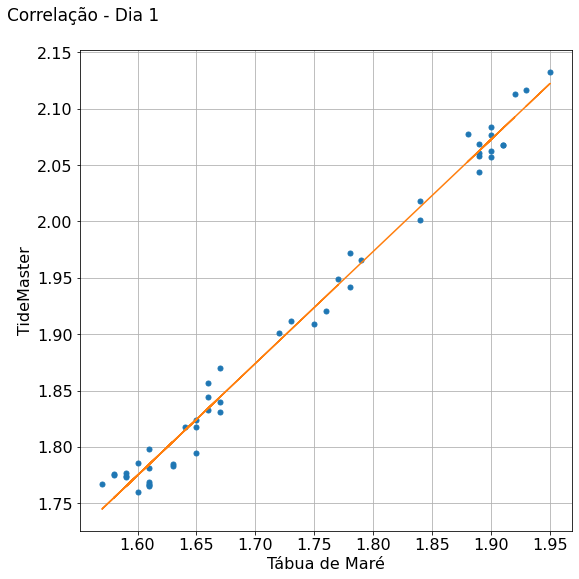

In [28]:
# Regression Plot Day 1 
lims = [1.5, 2.15]

fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Correlação - Dia 1", x=0, y=1, horizontalalignment='left', verticalalignment='top', fontsize = 15 + 2)
ax.plot(filter_tide1_dia1['water_level'], filter_tidemaster_day1['water_level'], marker=".", linestyle = 'None', markersize=10)
ax.plot(filter_tide1_dia1['water_level'], filter_tide1_dia1['water_level']*a + b)
ax.set_xlabel("Tábua de Maré", fontsize = fontsize_label + 2)
ax.set_ylabel("TideMaster", fontsize = fontsize_label + 2)
#ax.set_xlim(lims)
#ax.set_ylim(lims)

#ax.plot()
#ax.tick_params('x', labelrotation=45)
#ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.tick_params(labelsize=fontsize_ticks + 2)
ax.grid()
fig.tight_layout()
plt.savefig('reg_plot_day1.png', dpi = 300)

# disp = ax.annotate("teste", #xytext =(0.5 * offset, -offset),
#             xycoords ='figure pixels',
#             textcoords ='offset points',
#             bbox = bbox, arrowprops = arrowprops)


In [29]:
a2, b2 = get_coeff(tide_1_dia_2['water_level'], tidemaster_day2['water_level'])

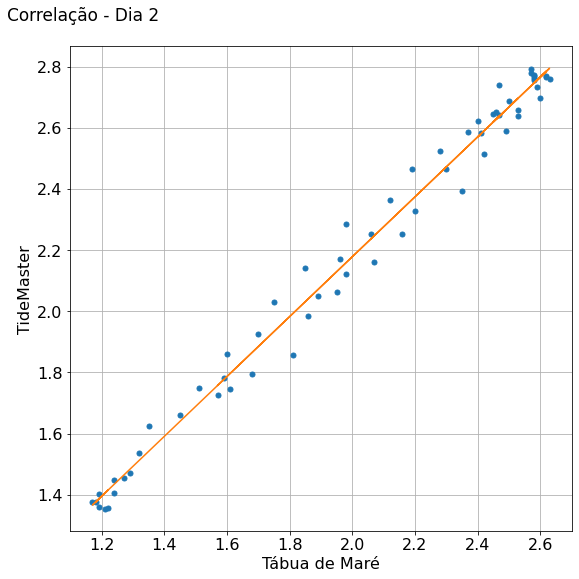

In [30]:
# Regression Plot Day 1 
lims = [1.5, 2.15]

fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle("Correlação - Dia 2", x=0, y=1, horizontalalignment='left', verticalalignment='top', fontsize = 15 + 2)
ax.plot(tide_1_dia_2['water_level'], tidemaster_day2['water_level'], marker=".", linestyle = 'None', markersize=10)
ax.plot(tide_1_dia_2['water_level'], tide_1_dia_2['water_level']*a2 + b2)
ax.set_xlabel("Tábua de Maré", fontsize = fontsize_label + 2)
ax.set_ylabel("TideMaster", fontsize = fontsize_label + 2)
#ax.set_xlim(lims)
#ax.set_ylim(lims)

#ax.plot()
#ax.tick_params('x', labelrotation=45)
#ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.tick_params(labelsize=fontsize_ticks + 2)
ax.grid()
fig.tight_layout()
plt.savefig('reg_plot_day2.png', dpi = 300)

### Média da Soma da Diferença

In [31]:
def mean_sum_diff(d1, d2):
    diff = d1 - d2
    mean_diff = diff.mean()
    return abs(mean_diff)

In [32]:
d1 = mean_sum_diff(filter_tide1_dia1['water_level'], filter_tidemaster_day1['water_level'])

In [33]:
d1

0.17386

In [34]:
d2 = mean_sum_diff(tide_1_dia_2['water_level'], tidemaster_day2['water_level'])

In [35]:
d2

0.178016393442623

### Corrigindo os dados do maŕegrafo

In [36]:
valores_leitura = filter_tide1_dia1['water_level'].values.tolist() + tide_1_dia_2['water_level'].values.tolist()
valores_tidemaster = filter_tidemaster_day1['water_level'].values.tolist() +  tidemaster_day2['water_level'].values.tolist()

In [78]:
def get_coeff(manual, automatic):
    x_mean = np.mean(manual)
    y_mean = np.mean(automatic)
    
    diff_x = manual - x_mean
    diff_y = automatic - y_mean
    
    a = sum((diff_x*diff_y))/sum((diff_x) ** 2)
    
    b = y_mean - a*x_mean
    
    return a, b



In [84]:
a_total, b_total = get_coeff(valores_tidemaster, valores_leitura)

In [85]:
a_total, b_total

(1.0052126411983715, -0.18687617403915535)

In [88]:
new_tidemaster = np.array(a_total) * np.array(tide_2['water_level'].values.tolist()) + b_total

In [89]:
# Valores do primeiro dia.
new_tidemaster = pd.DataFrame({'datetime':tide_2['datetime'].values, 'water_level':new_tidemaster})

### Novos plots

In [90]:
# Filtrando os dados...
newtidemaster_day1 = new_tidemaster[(new_tidemaster["datetime"] >= tide_1_dia_1['datetime'][0]) & (new_tidemaster["datetime"] <= tide_1_dia_1['datetime'].iloc[-1])]
newtidemaster_day2 = new_tidemaster[(new_tidemaster["datetime"] >= tide_1_dia_2['datetime'][0]) & (new_tidemaster["datetime"] <= tide_1_dia_2['datetime'].iloc[-1])]

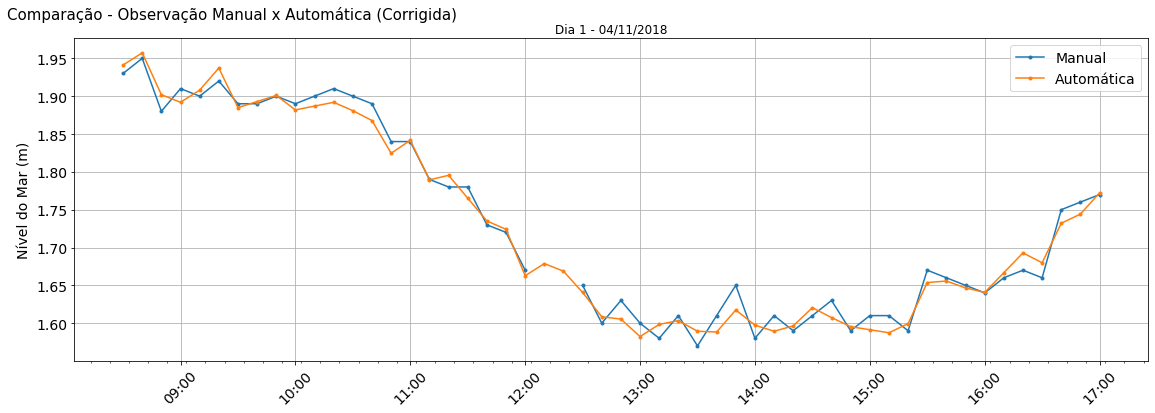

In [100]:
# Dia 1 
# PLOT DIA 1
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Comparação - Observação Manual x Automática (Corrigida)",x=0.0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
min10 = mdates.MinuteLocator(interval = 10)
hora = mdates.HourLocator(interval = 1)


ax.plot(tide_1_dia_1['datetime'], tide_1_dia_1['water_level'], marker=".", label = "Manual")
ax.plot(newtidemaster_day1['datetime'], newtidemaster_day1['water_level'], marker=".", label = "Automática")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(min10)
ax.xaxis.set_major_locator(hora)
ax.set_title("Dia 1 - 04/11/2018")
ax.tick_params(labelsize=fontsize_ticks)
ax.grid()
ax.legend(fontsize = fontsize_legend)
    
fig.tight_layout()
plt.savefig('manual_x_auto_dia1_corrigida.png', dpi = 300)

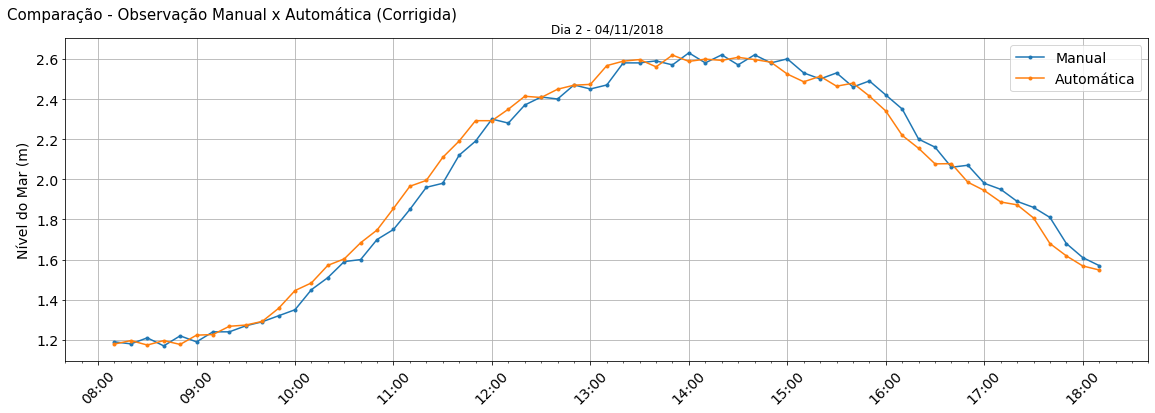

In [98]:
# PLOT DIA 2
fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Comparação - Observação Manual x Automática (Corrigida)", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
min10 = mdates.MinuteLocator(interval = 10)
hora = mdates.HourLocator(interval = 1)


ax.plot(tide_1_dia_2['datetime'], tide_1_dia_2['water_level'], marker=".", label = "Manual")
ax.plot(newtidemaster_day2['datetime'], newtidemaster_day2['water_level'], marker=".", label = "Automática")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(min10)
ax.xaxis.set_major_locator(hora)
ax.set_title("Dia 2 - 04/11/2018")
ax.tick_params(labelsize=fontsize_ticks)
ax.grid()
ax.legend(fontsize = fontsize_legend)
    
fig.tight_layout()
plt.savefig('manual_x_auto_dia2_corrigida.png', dpi = 300)

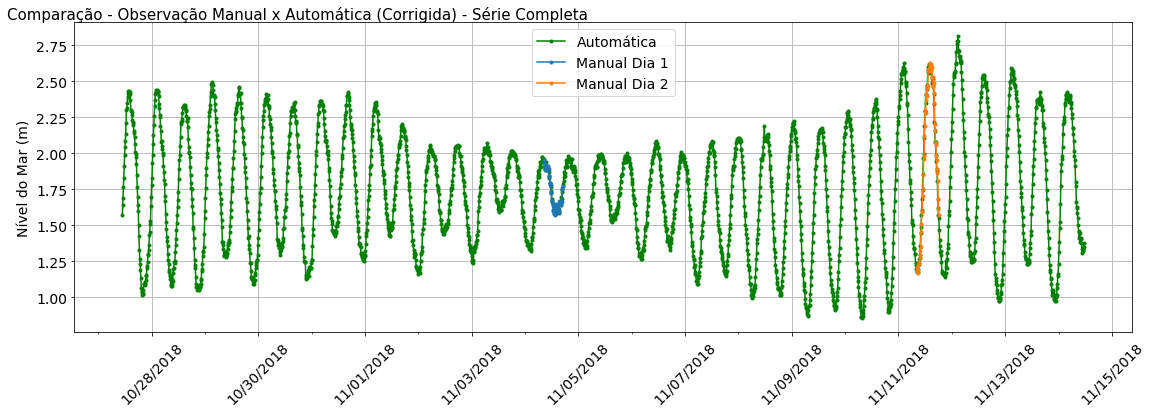

In [99]:
# Todos plots juntos...

fig, ax = plt.subplots(figsize=figsize_plots)
fig.suptitle("Comparação - Observação Manual x Automática (Corrigida) - Série Completa", x=0, y=.95, horizontalalignment='left', verticalalignment='top', fontsize = 15)

#ticks 
#ticks 
dias = mdates.DayLocator(interval = 2)
dia = mdates.DayLocator(interval = 1)
hora = mdates.HourLocator(interval = 1)

ax.plot(new_tidemaster['datetime'], new_tidemaster['water_level'], marker=".", label = "Automática", color='green')
ax.plot(tide_1_dia_1['datetime'], tide_1_dia_1['water_level'], marker=".", label = "Manual Dia 1")
ax.plot(tide_1_dia_2['datetime'], tide_1_dia_2['water_level'], marker=".", label = "Manual Dia 2")
ax.tick_params('x', labelrotation=45)
ax.set_ylabel('Nível do Mar (m)', fontsize = fontsize_label)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
ax.xaxis.set_minor_locator(dia)
ax.xaxis.set_major_locator(dias)
ax.tick_params(labelsize=fontsize_ticks)
ax.grid()
ax.legend(fontsize = fontsize_legend)
    
fig.tight_layout()
plt.savefig('all_plots_correcao.png', dpi = 300)

In [104]:
print("Mean Day1:", "Manual", filter_tide1_dia1['water_level'].mean(), "TideMaster",newtidemaster_day1['water_level'].mean())
print("Mean Day2:", "Manual", tide_1_dia_2['water_level'].mean(), "TideMaster", newtidemaster_day2['water_level'].mean())
print("STD Day1:", "Manual", filter_tide1_dia1['water_level'].std(), "TideMaster",filter_tidemaster_day1['water_level'].std())
print("STD Day2:", "Manual", tide_1_dia_2['water_level'].std(), "TideMaster", tidemaster_day2['water_level'].std())

Mean Day1: Manual 1.7324000000000002 TideMaster 1.7271840118888593
Mean Day2: Manual 2.0059016393442626 TideMaster 2.008425839859301
STD Day1: Manual 0.1267902011278506 TideMaster 0.12680658741660428
STD Day2: Manual 0.5061731490612684 TideMaster 0.4984392405326172
